In [32]:
import pandas as pd

# File paths for the three training datasets
file_paths = ['./Train_ddos1.csv', './Train_ddos2.csv', './Train_ddos3.csv', './Train_ddos4.csv']

# Initialize an empty list to store DataFrames
dataframes = []

# Load each CSV file into a DataFrame and append it to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
output_file = './Train_dataset_ddos.csv'
combined_df.to_csv(output_file, index=False)

print(f"Combined dataset saved to {output_file}.")

Combined dataset saved to ./Train_dataset_ddos.csv.


In [2]:
import pandas as pd
import numpy as np

# Load the training dataset
train_embeddings_path = './Train_dataset_ddos.csv'
train_df = pd.read_csv(train_embeddings_path)

# Ensure the 'Embeddings' column exists and process it
if 'Embeddings' not in train_df.columns:
    raise ValueError("The training dataset must contain an 'Embeddings' column.")

# Convert the 'Embeddings' column from strings to numpy arrays
train_df['Embeddings'] = train_df['Embeddings'].apply(eval)

# Extract the embeddings as a numpy array
train_embeddings = np.array(train_df['Embeddings'].tolist())

# Load the test dataset
test_embeddings_path = './test_ddos.csv'
test_df = pd.read_csv(test_embeddings_path)

# Ensure the 'Embeddings' column exists and process it
if 'Embeddings' not in test_df.columns:
    raise ValueError("The test dataset must contain an 'Embeddings' column.")

# Convert the 'Embeddings' column from strings to numpy arrays
test_df['Embeddings'] = test_df['Embeddings'].apply(eval)

# Extract the embeddings as a numpy array
test_embeddings = np.array(test_df['Embeddings'].tolist())


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization, Dropout

# Define the input shape
input_dim = train_embeddings.shape[1]

# Define the encoding dimension (size of the bottleneck layer)
encoding_dim = 16  # Reduce bottleneck size for better compression

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(256)(input_layer)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)  # Add batch normalization
encoded = Dropout(0.2)(encoded)          # Add dropout for regularization

encoded = Dense(128)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)

encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

# Decoder
decoded = Dense(128)(encoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(256)(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = BatchNormalization()(decoded)

decoded = Dense(input_dim, activation='sigmoid')(decoded)  # Output layer

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model with a reconstruction loss and an optimizer
autoencoder.compile(optimizer='adam', loss='mse')

# Print the model summary
autoencoder.summary()



/Users/oscarcanning-thompson/mdm3_phaseB/new_env_name/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 768)            │       197,376 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467,472 (1.78 MB)

 Trainable params: 465,936 (1.78 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [5]:
# Train the autoencoder
history = autoencoder.fit(
    train_embeddings, 
    train_embeddings,  # Target is the same as input for unsupervised learning
    epochs=50,         # Adjust epochs as needed
    batch_size=32,     # Adjust batch size as needed
    validation_split=0.2,  # Use 20% of training data for validation
    shuffle=True
)


Epoch 1/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5516e-04 - val_loss: 3.5548e-04
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5511e-04 - val_loss: 3.5546e-04
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5516e-04 - val_loss: 3.5547e-04
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5513e-04 - val_loss: 3.5544e-04
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5510e-04 - val_loss: 3.5544e-04
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5511e-04 - val_loss: 3.5541e-04
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5511e-04 - val_loss: 3.5542e-04
Epoch 8/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5508e-04 - val_loss: 3.5540e-04
Epoch 9/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5508e-04 - val_loss: 3.5539e-04
Epoch 10/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5502e-04 - val_loss: 3.5538e-04
Epoch 11/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss

In [6]:
# Compute reconstruction errors
reconstructed = autoencoder.predict(test_embeddings)
reconstruction_errors = np.mean(np.square(test_embeddings - reconstructed), axis=1)

# Define a threshold for anomaly detection (e.g., based on the training loss distribution)
threshold = np.percentile(reconstruction_errors, 95)  # 95th percentile of errors in training

# Flag anomalies
anomalies = reconstruction_errors > threshold

# Print the results
print(f"Number of anomalies detected: {np.sum(anomalies)}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Number of anomalies detected: 43


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


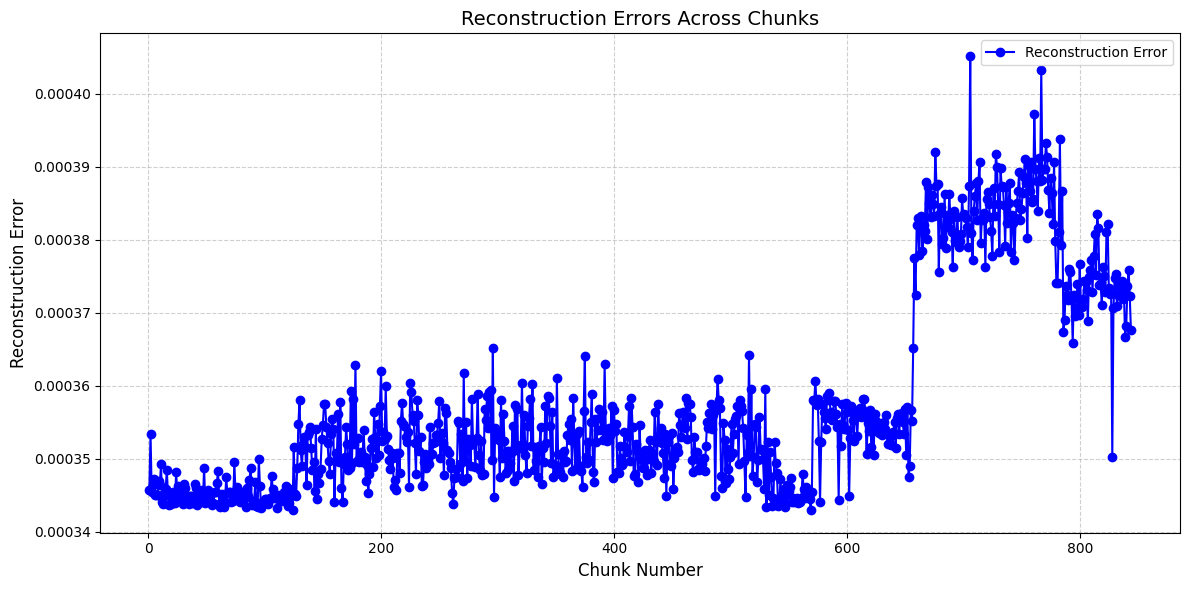

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual data
chunk_ids = np.arange(1, len(reconstruction_errors) + 1)  # Create sequential chunk IDs starting from 1
reconstruction_errors = np.mean(np.square(test_embeddings - autoencoder.predict(test_embeddings)), axis=1)  # Reconstruction errors

# Plot reconstruction errors for each chunk
plt.figure(figsize=(12, 6))
plt.plot(chunk_ids, reconstruction_errors, marker='o', linestyle='-', color='b', label='Reconstruction Error')

# Customize the plot
plt.title('Reconstruction Errors Across Chunks', fontsize=14)
plt.xlabel('Chunk Number', fontsize=12)
plt.ylabel('Reconstruction Error', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()
